1/300 ... likelihood: -1176.193786263384
2/300 ... likelihood: -839.4904661706224
3/300 ... likelihood: -791.4912539760836
4/300 ... likelihood: -691.1419696941281
5/300 ... likelihood: -620.2156014572436
6/300 ... likelihood: -575.5140799438593
7/300 ... likelihood: -546.5412246177432
8/300 ... likelihood: -528.0520833962
9/300 ... likelihood: -515.3933870503362
10/300 ... likelihood: -504.90025171357416
11/300 ... likelihood: -495.5144704121284
12/300 ... likelihood: -487.2910312280456
13/300 ... likelihood: -480.70687777231353
14/300 ... likelihood: -475.71950366818027
15/300 ... likelihood: -471.86688117079257
16/300 ... likelihood: -468.7990722456108
17/300 ... likelihood: -466.304651050512
18/300 ... likelihood: -464.25958912631324
19/300 ... likelihood: -462.5618494018031
20/300 ... likelihood: -461.10589629314995
21/300 ... likelihood: -459.8010598714551
22/300 ... likelihood: -458.5815364618959
23/300 ... likelihood: -457.40455938465163
24/300 ... likelihood: -456.247328327521

220/300 ... likelihood: -416.31539096385234
221/300 ... likelihood: -416.3325762390833
222/300 ... likelihood: -416.3516789255216
223/300 ... likelihood: -416.371547221219
224/300 ... likelihood: -416.3913578510206
225/300 ... likelihood: -416.41054783246994
226/300 ... likelihood: -416.42875387933543
227/300 ... likelihood: -416.4457616670006
228/300 ... likelihood: -416.461464122041
229/300 ... likelihood: -416.4758299342105
230/300 ... likelihood: -416.48887930995994
231/300 ... likelihood: -416.50066577529236
232/300 ... likelihood: -416.51126345135424
233/300 ... likelihood: -416.5207574680891
234/300 ... likelihood: -416.5292378772382
235/300 ... likelihood: -416.5367947159646
236/300 ... likelihood: -416.5435155763254
237/300 ... likelihood: -416.5494834942724
238/300 ... likelihood: -416.55477619423414
239/300 ... likelihood: -416.5594652571085
240/300 ... likelihood: -416.5636161199769
241/300 ... likelihood: -416.5672882058732
242/300 ... likelihood: -416.570535136995
243/300

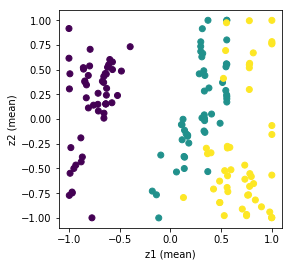

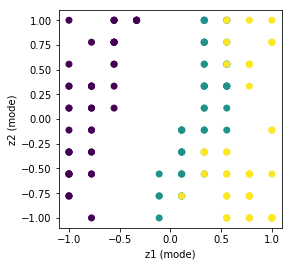

In [2]:
# -*- coding: utf-8 -*- 
# %reset -f
"""
@author: Hiromasa Kaneko
"""
%matplotlib inline
# Demonstration of GTM

import matplotlib.figure as figure
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from gtm import gtm

# settings
shape_of_map = [10, 10]
shape_of_rbf_centers = [5, 5]
variance_of_rbfs = 4
lambda_in_em_algorithm = 0.001
number_of_iterations = 300
display_flag = 1

# load an iris dataset
iris = load_iris()
# input_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
input_dataset = iris.data
color = iris.target

# autoscaling
input_dataset = (input_dataset - input_dataset.mean(axis=0)) / input_dataset.std(axis=0, ddof=1)

# construct GTM model
model = gtm(shape_of_map, shape_of_rbf_centers, variance_of_rbfs, lambda_in_em_algorithm, number_of_iterations,
            display_flag)
model.fit(input_dataset)

if model.success_flag:
    # calculate of responsibilities
    responsibilities = model.responsibility(input_dataset)

    # plot the mean of responsibilities
    means = responsibilities.dot(model.map_grids)
    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(means[:, 0], means[:, 1], c=color)
    plt.ylim(-1.1, 1.1)
    plt.xlim(-1.1, 1.1)
    plt.xlabel("z1 (mean)")
    plt.ylabel("z2 (mean)")
    plt.show()

    # plot the mode of responsibilities
    modes = model.map_grids[responsibilities.argmax(axis=1), :]
    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(modes[:, 0], modes[:, 1], c=color)
    plt.ylim(-1.1, 1.1)
    plt.xlim(-1.1, 1.1)
    plt.xlabel("z1 (mode)")
    plt.ylabel("z2 (mode)")
    plt.show()
